In [101]:
# -*- coding: utf-8 -*-
# %%python3

# Projeto Integrado -  Online Ice Games Store 

Este estudo do caso tem como objetivo simular uma análise da loja Online Ice, que possui segmentação na venda de jogos de videogame, sua abrangência de comercialização de produtos é o mundo todo.

Como características para este produto, as avaliações de histórico de vendas de jogos estão disponíveis em fontes abertas, sendo assim iremos acessar estes dados para identificar padrões que determinam se um jogo tem sucesso ou não.

Desta forma isso permitirá ter maior visibilidade de grandes vencedores de vendas e/ou melhores avaliações para planejar campanhas publicitárias.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px
import warnings
from plotly.tools import FigureFactory as ff

In [36]:
try:
    df = pd.read_csv('datasets/games.csv')

except:
    df = pd.read_csv('games.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [38]:
df = df.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating',
})

Percebemos que há muitas colunas com valores ausentes e ainda com o nome das colunas com letra maiúsculas com isso ,irei fazer alterações !

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [40]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


 Ao utilizar a função describe, podemos analisar que a base de dados abrange o período de 1980 a 2016, a mediana dos dados em relação aos anos está localizada em 2007, podemos observar que a América do Norte apresenta a maior média de vendas em comparação com outras regiões

Descrição de dados
- Name (nome)
- Platform (plataforma)
- Year_of_Release (Ano de lançamento)
- Genre(gênero)
- NA_sales (vendas norte-americanas em milhões de USD)
- EU_sales (vendas na Europa em milhões de USD)
- JP_sales (vendas no Japão em milhões de USD)
- Other_sales (vendas em outros países em em milhões de USD)
- Critic_Score - (Pontuação crítica) (máximo de 100)
- User_Score - (Pontuação do usuário) (máximo de 10)
- Classificação (ESRB)

In [41]:
# verificando os dados ausentes nas colunas

df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [42]:
# name
df['name'] = df['name'].astype(object)
df['name'] = df['name'].fillna('unknown')

# year_of_release
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())
df['year_of_release'] = df['year_of_release'].astype(int)

# genre
df['genre'] = df['genre'].fillna('unknown')

# critic_score
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

# user_score
df['user_score'] = df['user_score'].replace('tbd',np.nan).astype(float)
df['user_score'] = df['user_score'].fillna(df['user_score'].median())

# rating
df['rating'] = df['rating'].fillna('unknown')

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [43]:
# Verificando quantidade de valores ausentes
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [44]:
# Vendo se há valores duplicados

df.duplicated().sum()

0

In [45]:
df_shape = df.shape[0]
df_null = df.isnull().sum()
dft = ( df_null / df_shape ) * 100
dft = pd.DataFrame(dft)
dft = dft.rename(columns = {0:'Porcentagem de NaN'})
dft

,Porcentagem de NaN
name,0.0
platform,0.0
year_of_release,0.0
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,0.0
user_score,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Percebemos que nas colunas critic_score, user_score e rating há muitos valores ausentes e se eliminalos irá nos atrapalhar na leitura e nos compromete muito na análise!

 Especificamente, ao examinar as variáveis "critic score", "user score" e "rating" em termos percentuais, identificamos que elas possuem um grande volume de dados ausentes. Essa falta de informações pode comprometer a análise investigativa dessas características.

Para lidar com essa situação, propomos a construção de duas modelagens distintas: uma que considere os dados ausentes e outra que os exclua, substituindo-os por valores compatíveis em cada característica.

Essa abordagem nos permitirá comparar os resultados obtidos com e sem a inclusão dos dados ausentes, fornecendo uma visão mais abrangente e robusta da análise. Ao substituir os valores faltantes por informações adequadas, poderemos mitigar os impactos negativos causados pela falta de dados e obter insights mais confiáveis a partir das características em questão.

# Analisando e Enriquecendo os dados 

Vamos criar uma coluna aonde nos mostrará venda dos jogos no mundo todo

In [47]:
df['total_vendas'] = df['jp_sales'] + df['eu_sales'] + df['na_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_vendas
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,unknown,31.38


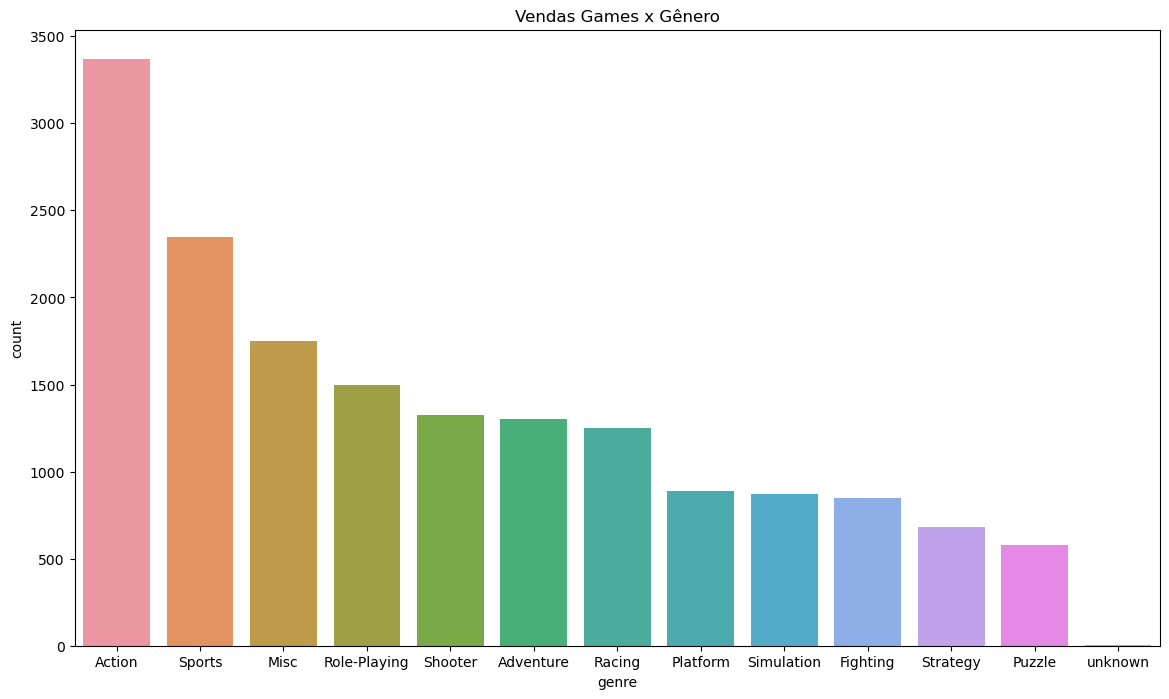

In [48]:
# construindo gráfico com genero de jogos mais vendidos por genero
plt.figure(figsize=(14,8))
#-------------------Estilizando Gráfico-----------------------#
sns.countplot(df['genre'], x = df['genre'], order = df['genre'].value_counts().index);
plt.title('Vendas Games x Gênero');

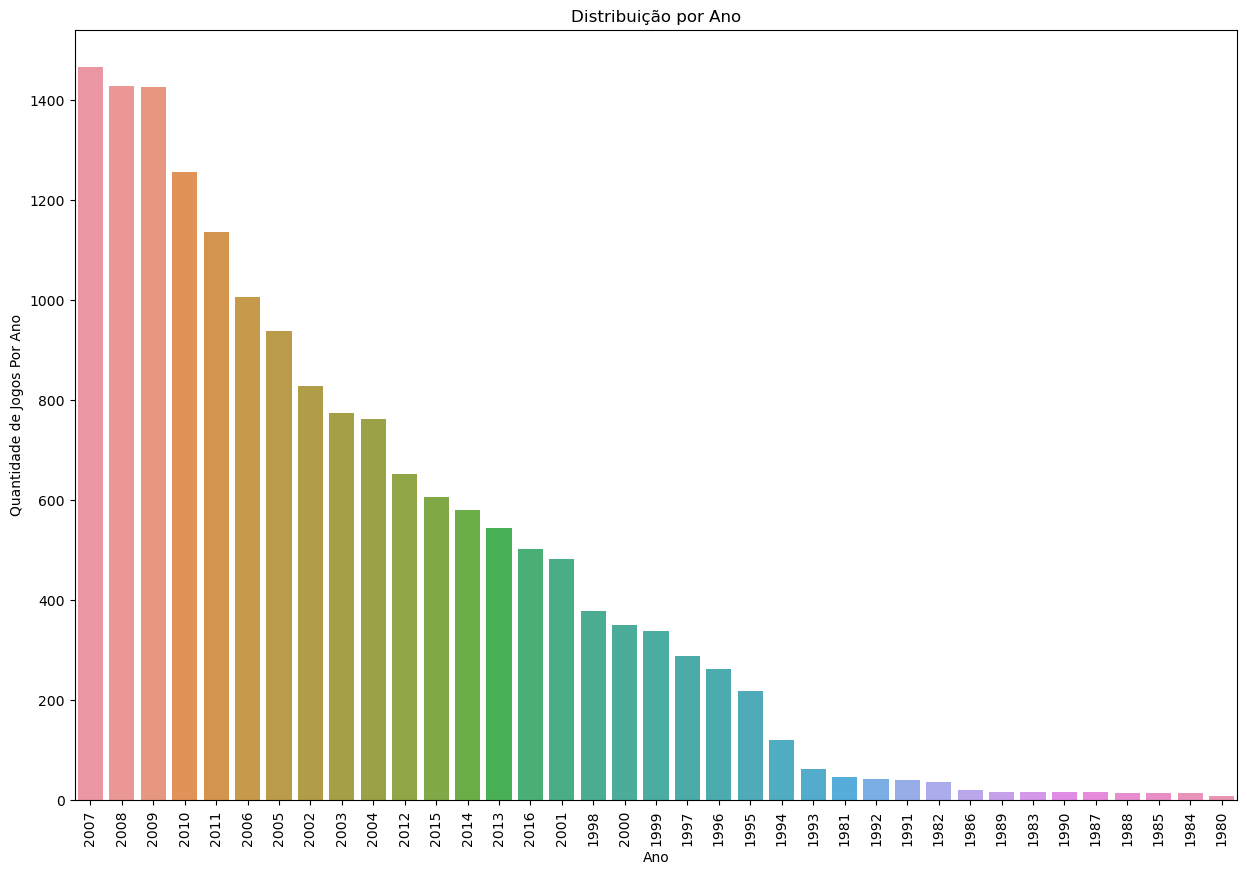

In [49]:
plt.figure(figsize=(15, 10))
sns.countplot( x=df["year_of_release"], order = df.groupby(by=['year_of_release'])['name'].count().sort_values(ascending=False).index);
#-------------------Estilizando Gráfico-----------------------#

plt.xticks(rotation=90);
plt.title('Distribuição por Ano');
plt.ylabel('Quantidade de Jogos Por Ano');
plt.xlabel('Ano');

Text(0.5, 1.0, 'Distrbuição de jogo por ano')

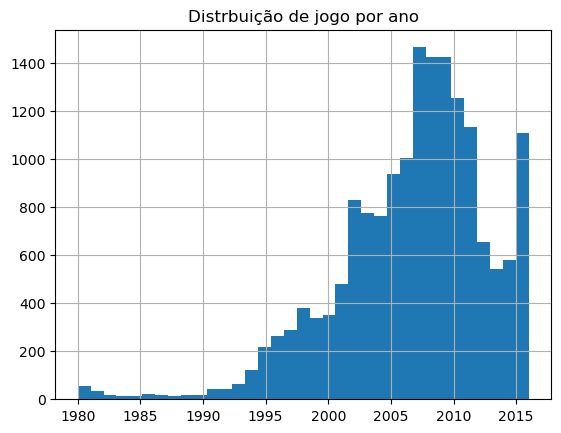

In [50]:
df.hist(['year_of_release'], bins=35)
plt.title('Distrbuição de jogo por ano')

In [51]:
# Criando uma pivot_table com o ano e a quantidades de jogos lançadas por ano
games_year = df.pivot_table(index='year_of_release',
                               values='name',
                               aggfunc='count').rename(columns={
                                   'name': 'count'
                               }).reset_index()
# Ordenando a coluna 'count' para ver os anos com mais lançamentos
games_year.sort_values(by='count', ascending=False)

,year_of_release,count
27,2007,1466
28,2008,1427
29,2009,1426
30,2010,1255
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


<Axes: xlabel='year_of_release'>

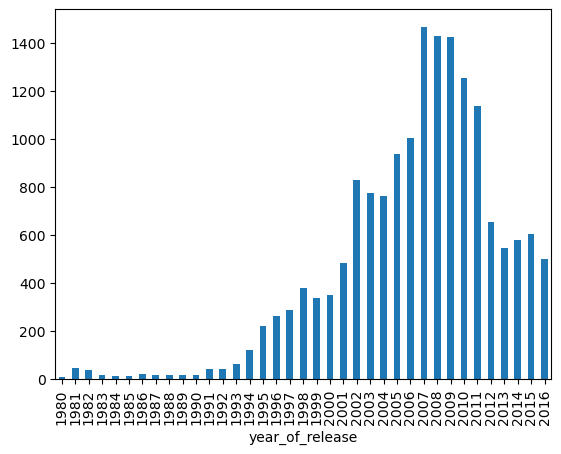

In [52]:
df_year = df.groupby('year_of_release')['platform'].count()
df_year.plot(kind='bar')

Aqui em cima fiz um gráfico aonde identificamos que há uma grande crescente entre 2005 e 2010 , pode ser pelo fato que teve um grande investimento nas marcas para os jogos 

# Zoom entre os anos de 2007 a 2010 ( Anos de Maiores Vendas )

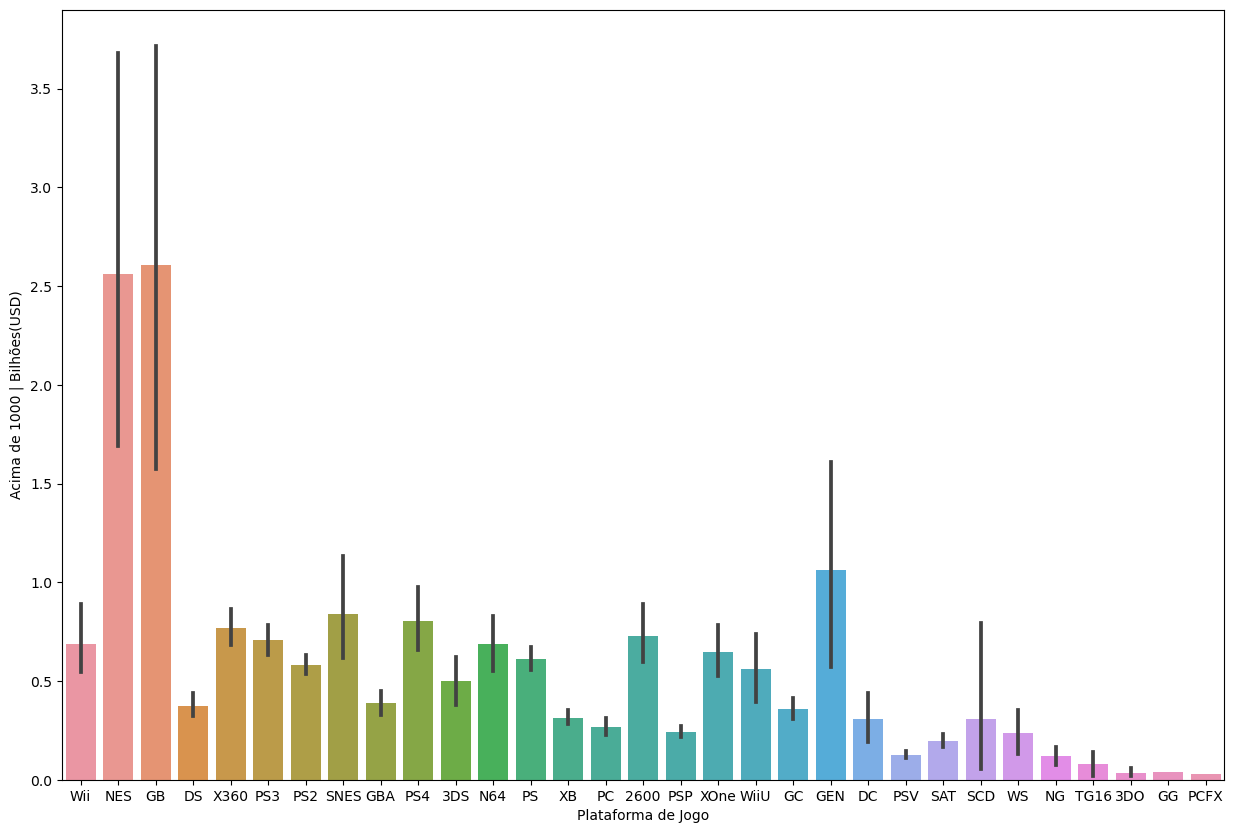

In [53]:
plt.figure(figsize=(15, 10))
# verificando plataformas que obtiveram maior número de vendas entre 2008 a 2010
w = df.query('year_of_release >= 2007 & year_of_release < 2011 ')
#-------------------Estilizando Gráfico-----------------------#
sns.barplot(x=df["platform"], y=df["total_vendas"]);
plt.ylabel('Acima de 1000 | Bilhões(USD)');
plt.xlabel('Plataforma de Jogo');

É perceptível que durante o período de 2008 a 2010, três plataformas alcançaram vendas superiores a 500 milhões dólares, com destaque para X360, PS3 e Wii, que registraram um volume de vendas acima de 800 milhões de dólares.

Ao analisarmos os dados e abrirmos as informações nos anos em que as plataformas de jogos apresentaram um crescimento mais exponencial em suas vendas, identificamos um cenário distinto. A plataforma X360 continua liderando as vendas, porém, juntam-se a ela o PS3 e o Wii, que também se destacaram no ranking de vendas nesses anos.

<Axes: xlabel='platform'>

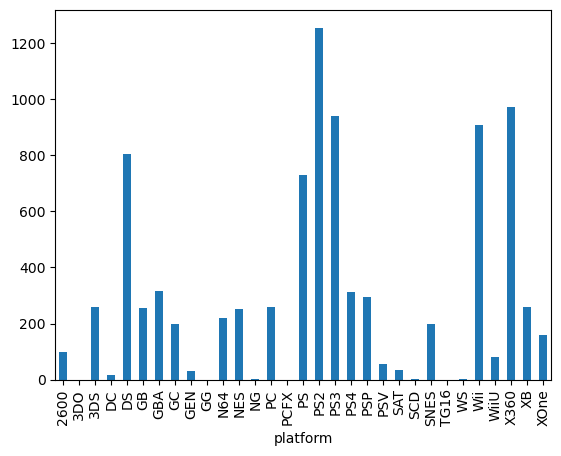

In [54]:
data = df.groupby('platform')['total_vendas'].sum()
data.plot(kind='bar') 

In [55]:
df_qu = df.query('year_of_release > = 1994')
df_qu = pd.DataFrame(df_qu.groupby('platform')['name'].count())
df_qu

,name
platform,
2600,17
3DO,3
3DS,520
DC,52
DS,2150
GB,68
GBA,822
GC,556
GEN,12


Aqui percebemos que as 5 plataformas mais famosas são DS , PS2 , Wii , PS3 e X360

<Axes: >

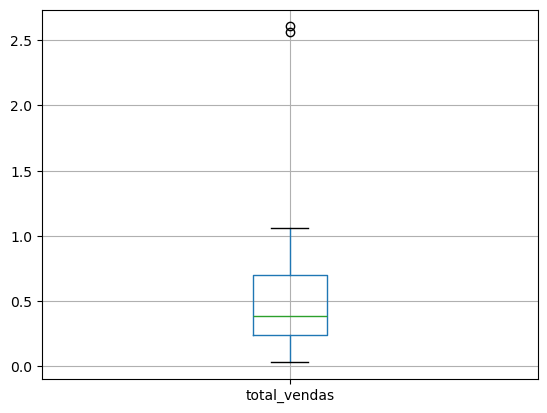

In [56]:
# Criando diagrama de caixa das vendas de cada plataforma
df_diag = df.pivot_table(index='platform', values='total_vendas')
df_diag.boxplot()

# Avaliação do usuário e profissional 

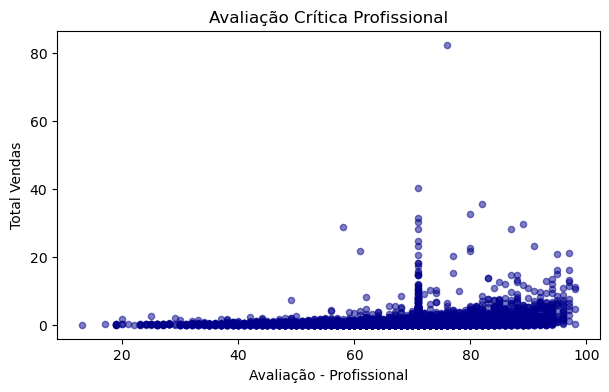

In [57]:
#-------------------------Estilizando--------------------------------#
df.plot(kind='scatter', x='critic_score', 
        y='total_vendas', alpha=0.5, 
        color='darkblue', figsize = (7,4),
        title='Avaliação Crítica Profissional', 
        xlabel = "Avaliação - Profissional", 
        ylabel= "Total Vendas");

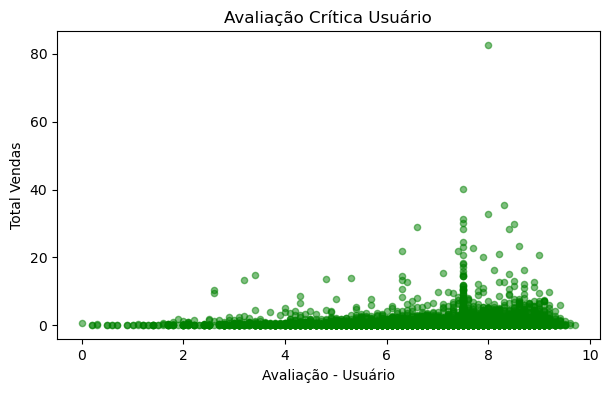

In [58]:
#-------------------------Estilizando--------------------------------#

df.plot(kind='scatter', x='user_score', 
        y='total_vendas', alpha=0.5, 
        color='green', figsize = (7,4), 
        title= 'Avaliação Crítica Usuário', 
        xlabel= "Avaliação - Usuário", 
        ylabel= "Total Vendas");


Ao analisarmos as avaliações de críticos profissionais e usuários, é possível observar uma correlação entre essas avaliações e as vendas dos jogos, porém temos casos em que jogos tem uma potencial venda sem estar vinculado a avaliação. Quando um jogo recebe avaliações positivas tanto por parte dos críticos quanto dos usuários, isso tende a estar correlacionado com um maior número de vendas.

# Perfil de usuário por região

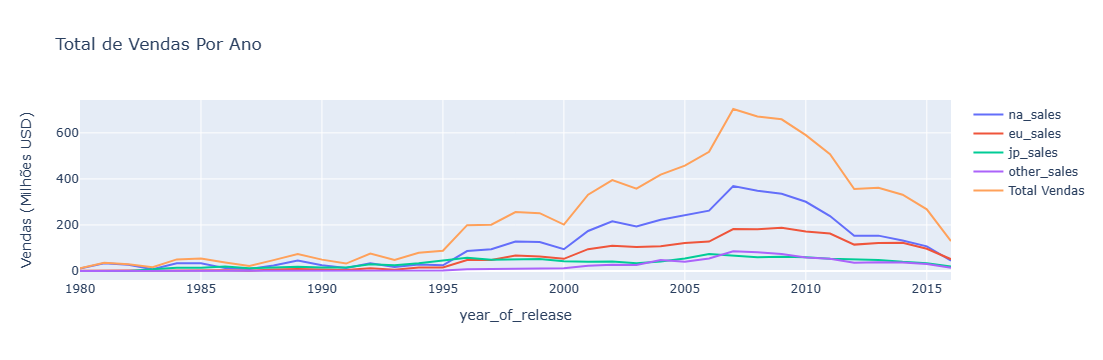

In [59]:
# selecionando regiões e vendas em novo dataframe
df_year = df[['na_sales','eu_sales','jp_sales','other_sales','total_vendas','year_of_release']]
yearly_sales = df_year.groupby('year_of_release').sum()

# criando gráfico para plotar as linhas de cada região
fig = go.Figure()
for i, market in enumerate(yearly_sales.columns[:-1]):
    fig.add_trace(go.Scatter(x=yearly_sales.index, y=yearly_sales[market], mode='lines', name=market, line=dict()))
    
# adicionando a linha das vendas totais
fig.add_trace(go.Scatter(x=yearly_sales.index, y=yearly_sales['total_vendas'], mode='lines', name='Total Vendas', line=dict()))

# Inserindo labels no gráfico
fig.update_layout(xaxis_title='year_of_release', yaxis_title='Vendas (Milhões USD)', title='Total de Vendas Por Ano')
fig.show()

In [60]:
# Analisando os principais gêneros
PS2 = df[df['platform'] == 'PS2'].reset_index()
PS2 = PS2.groupby('genre')['total_vendas'].sum()
PS2

genre
Action          272.71
Adventure        21.24
Fighting         92.61
Misc            101.09
Platform         72.54
Puzzle            5.94
Racing          156.39
Role-Playing     93.55
Shooter         108.49
Simulation       42.65
Sports          273.48
Strategy         15.08
Name: total_vendas, dtype: float64

In [61]:
PS3 = df[df['platform'] == 'PS3'].reset_index()
PS3 = PS3.groupby('genre')['total_vendas'].sum()
PS3

genre
Action          301.59
Adventure        22.31
Fighting         51.11
Misc             46.86
Platform         29.80
Puzzle            0.59
Racing           72.13
Role-Playing     73.71
Shooter         192.54
Simulation       10.38
Sports          133.78
Strategy          4.85
Name: total_vendas, dtype: float64

In [62]:
X360 = df[df['platform'] == 'X360'].reset_index()
X360 = X360.groupby('genre')['total_vendas'].sum()
X360

genre
Action          239.65
Adventure        14.89
Fighting         37.32
Misc             91.57
Platform         11.29
Puzzle            0.87
Racing           64.98
Role-Playing     71.39
Shooter         276.92
Simulation       14.19
Sports          138.34
Strategy         10.01
Name: total_vendas, dtype: float64

In [63]:
DS = df[df['platform'] == 'DS'].reset_index()
DS = DS.groupby('genre')['total_vendas'].sum()
DS

genre
Action          112.58
Adventure        45.97
Fighting          7.08
Misc            135.64
Platform         75.83
Puzzle           82.48
Racing           38.00
Role-Playing    124.45
Shooter           7.86
Simulation      129.98
Sports           31.38
Strategy         14.87
Name: total_vendas, dtype: float64

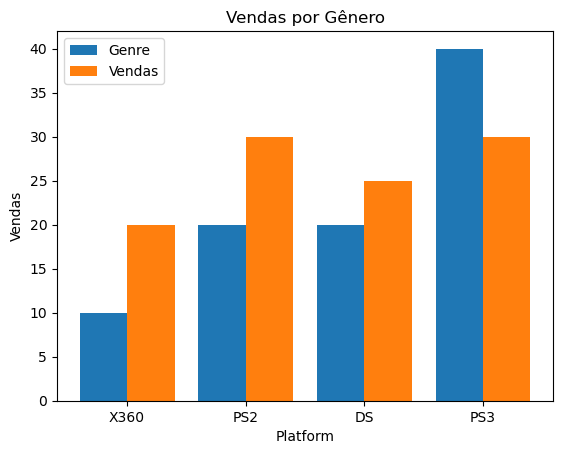

In [64]:
X = ['X360','PS2','DS','PS3']
YGenre = [10,20,20,40]
ZVendas = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, YGenre, 0.4, label = 'Genre')
plt.bar(X_axis + 0.2, ZVendas, 0.4, label = 'Vendas')
  
plt.xticks(X_axis, X)
plt.xlabel("Platform")
plt.ylabel("Vendas")
plt.title("Vendas por Gênero")
plt.legend()
plt.show()

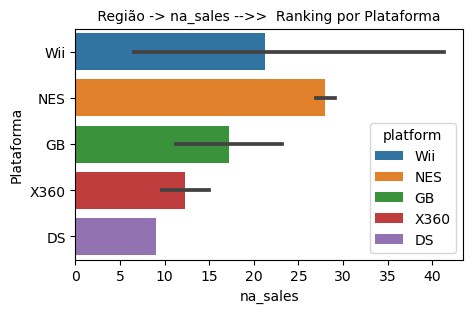

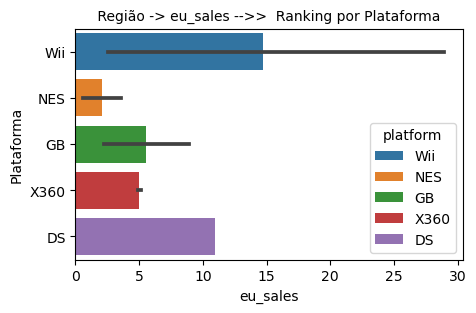

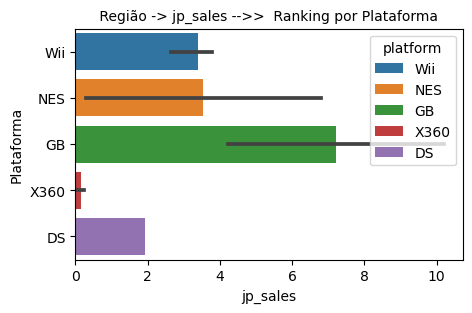

In [65]:
# Região da plataforma
df_aux = df[['platform','genre','na_sales','eu_sales','jp_sales']]\
                .loc[df.groupby('genre').na_sales.agg('idxmax')]\
                .sort_values('na_sales',ascending=False)[0:10].head(10)\
                .set_index('genre')
vendas = ['na_sales','eu_sales','jp_sales']
for v in vendas:
    plt.figure(figsize = (5,3))
    sns.barplot(x = v, y = 'platform', hue='platform', data=df_aux, dodge=False)
    plt.title(f" Região -> {v} -->>  Ranking por Plataforma ",size=10)
    plt.ylabel('Plataforma', size=10)    

Ao analisar o perfil por região em relação às preferências de plataforma de jogos, podemos observar padrões distintos. Na América do Norte, os usuários têm uma preferência pelo uso do Wii e do NES. Na Europa, podemos perceber que os usuários são mais ativos no uso do Wii e do DS (Nintendo DS). Já no Japão, os usuários dão preferência aos portáteis da Game Boy. Essas diferenças regionais revelam as preferências culturais e históricas dos usuários em relação às plataformas de jogos. O Wii e o DS tiveram um impacto significativo tanto na América do Norte quanto na Europa, enquanto os consoles portáteis da Game Boy são mais populares no Japão, refletindo as tendências e preferências específicas desse mercado.

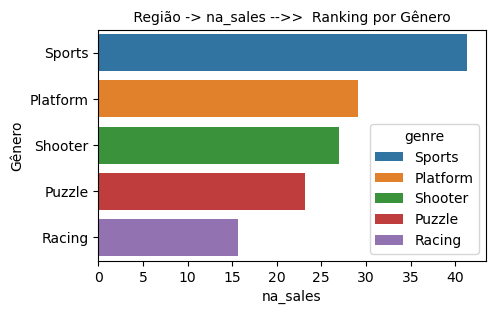

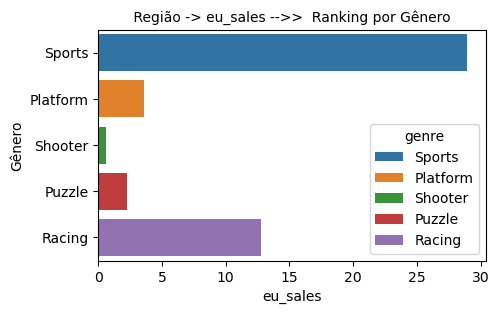

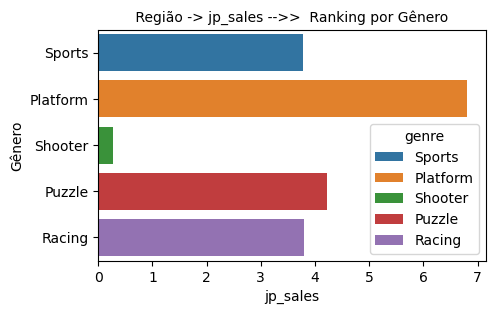

In [66]:
# Região por gênero
df_aux = df[['platform','genre','na_sales','eu_sales','jp_sales']]\
                .loc[df.groupby('genre').na_sales.agg('idxmax')]\
                .sort_values('na_sales',ascending=False)[0:10].head(5)\
                .set_index('platform')
vendas = ['na_sales','eu_sales','jp_sales']
for v in vendas:
    plt.figure(figsize = (5,3))
    sns.barplot(x = v, y = 'genre', hue='genre', data=df_aux, dodge=False)
    plt.title(f" Região -> {v} -->>  Ranking por Gênero ",size=10)
    plt.ylabel('Gênero', size=10)    

Quanto aos gêneros de jogos, podemos observar preferências distintas em cada região. Na América do Norte, os jogos de esportes são os mais preferidos. Essa preferência se estende também à Europa, onde os jogos de esportes são populares entre os usuários. Por outro lado, no Japão, há uma preferência pelo segmento de jogos de plataforma. Essa diferenciação reflete as preferências culturais e as características únicas de cada região. Enquanto os jogos de esportes têm um apelo mais amplo na América do Norte e na Europa

# Hipóteses

Teste de Normalidade para as Médias avaliação dos usuários para as plataformas Xbox One e PC

Plataforma Xbox

In [ ]:
from scipy.stats import normaltest
from scipy import stats as st

In [ ]:
# valor de significancia agregado ao estudo
significancia = 0.05

In [ ]:
# fatiando os dados para eliminar valores nulos para a plataforma
df_us = df[df['user_score'].notnull()]
df_XOne = df_us.query('platform == "XOne"')

In [ ]:
df_XOne['user_score'].hist();

In [ ]:
# realizando teste de normalidade usando a biblioteca scpiy
stat_test, p_valor = normaltest(df_XOne.user_score)
print(stat_test)
print(p_valor)

In [ ]:
# verificando se valor de P_valor é menor que significancia 
if p_valor <= significancia:
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Plataforma PC

In [ ]:
# fatiando os dados para eliminar valores nulos para a plataforma
df_us = df[df['user_score'].notnull()]
df_PC = df_us.query('platform == "PC"')

In [ ]:
df_PC['user_score'].hist();

In [ ]:
# realizando teste de normalidade usando a biblioteca scpiy
stat_test, p_valor = normaltest(df_PC.user_score)
print(stat_test)
print(p_valor)

In [ ]:
# verificando se valor de P_valor é menor que significancia 
if p_valor <= significancia:
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

In [ ]:
sample_1 = df_XOne['user_score'][df_XOne['user_score'].notna()].tolist()
sample_2 = df_PC['user_score'][df_PC['user_score'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Amostra de variâncias:', var_sample)

In [ ]:
# nível crítico de significância estatística
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

In [ ]:
print('A média da avaliação de usuários do XOne: {:.2f}'.format(df_XOne['user_score'][df_XOne['user_score'].notna()].mean()))
print('A média da avaliação de usuários do PC:  {: .2f}'.format(df_PC['user_score'][df_PC['user_score'].notna()].mean()))

Obtivemos o resultado do teste de Levene, no qual não rejeitamos a hipótese nula. Isso indica que as variâncias não são diferentes. Além disso, ao analisarmos o valor-p, que ficou abaixo do nível de significância, constatamos que as médias são diferentes. Ao compararmos as médias entre as duas plataformas, percebemos que a média de avaliação dos usuários de PC é 0,54 maior do que a do XOne.

Ao realizar o teste de normalidade entre as duas plataformas para ambas foram rejeitadas a hipótese Zero, pois dado ao nível de significancia em 0.05 e o teste realizado ambas são menores que o valor de significancia parametrizado para este estudo.

Também ao plotar os histogramas para as plataformas, podemos já observar que não possui a forma de sino de forma simétrica descartando esta hipótese através da verificação visual.

# Classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?

Vamos realizar uma média dos gêneros Action e Sports

Considerando que:

H0 representa a hipótese nula de que as médias entre as duas são iguais.
H1 é a hipótese alternativa no caso de não serem iguais.
Levaremos em consideração um nível de significância de 0.05 (alpha) 

In [ ]:
df_action = df.query('genre == "Action" and user_score.notnull()')
df_sport = df.query('genre == "Sports" and user_score.notnull()')

In [ ]:
sample_1 = df_action['user_score'][df_action['user_score'].notna()].tolist()
sample_2 = df_sport['user_score'][df_sport['user_score'].notna()].tolist()
alpha = 0.05
stat, p_value = st.levene(sample_1, sample_2)
result_levene = p_value

if result_levene < alpha:
    print('Rejeitamos H0, variâncias são diferentes, equal_var = Falso para o teste')
else:
    print('Não rejeitamos H0, variancias não são diferentes, equal_var = Verdadeiro para o teste')

var_sample = [np.var(x, ddof=1) for x in [sample_1, sample_2]]
print('Amostra de variâncias:', var_sample)

In [ ]:
alpha = 0.05  # nível crítico de significância estatística

results = st.ttest_ind(
    df_action['user_score'], df_sport['user_score'], equal_var=False
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

In [ ]:
print('A média da avaliação de usuários gênero Ação: {:.2f}'.format(df_action['user_score'][df_action['user_score'].notna()].mean()))
print('A média da avaliação de usuários gênero PC  :{: .2f}'.format(df_sport['user_score'][df_sport['user_score'].notna()].mean()))

Ao realizar o teste nas duas amostras das avaliações médias dos usuários para os gêneros de ação e esportes, rejeitamos a hipótese nula, pois as variâncias são diferentes. No entanto, ao examinarmos as médias, não rejeitamos a hipótese nula, o que indica que, para esse teste, as amostras possuem médias iguais. Além disso, ao observarmos os valores relacionados às médias, percebemos que elas são, de fato, semelhantes.

# Conclusão Geral

Dentro deste estudo, observamos uma história ao longo de 30 anos, com o surgimento de plataformas inovadoras e o descontinuamento de outras. Fica claro que, no mercado de tecnologia, é fundamental estar atualizado em relação às novas tendências que os usuários adotam em relação aos jogos. Nesse contexto, as plataformas que se destacaram foram PlayStation, Wii, Xbox e DS. No que diz respeito aos gêneros de jogos, os mais atrativos para os usuários são os de ação e esportes.



Uma variável importante neste estudo é o lançamento de jogos, que teve um crescimento constante a partir do ano 2000, resultando em um aumento das receitas de vendas. A década de 2000 foi marcada por uma explosão no mundo dos jogos, com o surgimento de novas tecnologias e novos tipos de jogos que conquistaram os usuários.

Existem vários tipos de jogos que fizeram muito sucesso ao longo dos anos, mas um jogo que mantém uma base de usuários há mais de 30 anos e continua sendo um dos principais em termos de vendas é o Super Mario e suas variações. A plataforma Wii trouxe uma revolução tecnológica com o escaneamento de imagens e a interatividade para jogar jogos de esportes em uma realidade virtual. Essa plataforma tem se mantido sólida para os usuários interessados nesse gênero, quanto às regiões de destaque em vendas, a América do Norte e a Europa são os principais impulsionadores do mercado.

In [100]:
df.to_csv('games_clean.csv', index=False)